In [1]:
import os
import struct
import numpy as np

In [31]:
def load_mnist(path='', kind='train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as f:
        magic, n = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    
    with open(images_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(len(labels), 784)
        
        images = ((images / 255.) - .5) * 2
    
    return images, labels

In [38]:
Xtrain, ytrain = load_mnist(kind='train')
print('Rows: %d, columns: %d' % Xtrain.shape)

Rows: 60000, columns: 784


In [39]:
Xtest, ytest = load_mnist(kind='t10k')
print('Rows: %d, columns: %d' % Xtest.shape)

Rows: 10000, columns: 784


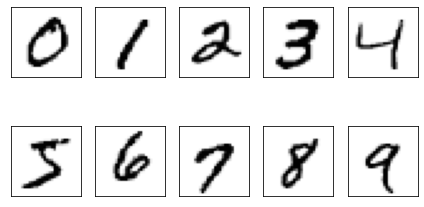

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = Xtrain[ytrain == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [53]:
np.random.randint(0, Xtrain.shape[0])

22478

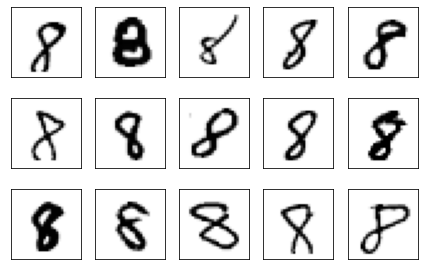

In [90]:
import matplotlib.pyplot as plt

digit = 8
nrows = 3
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(nrows * ncols):
    data = Xtrain[ytrain == digit]
    idx = np.random.randint(0, data.shape[0])
    img = data[idx].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [91]:
import numpy as np

In [92]:
np.savez_compressed('mnist_scaled.npz',
                   Xtrain=Xtrain,
                   ytrain=ytrain,
                   Xtest=Xtest,
                   ytest=ytest)